# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 604


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [18]:
# Set the API base URL
#url = "https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid=" + weather_api_key # YOUR CODE HERE
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&appid=" + weather_api_key

#units="metric"

#query_url= url + "appid=" + api_keys + "&q=" + city
#response=requests.get(url + units).json

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each cit
    city_url=url + "&q=" + city
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    
    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json() # YOUR CODE HERE
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and dat
        city_lat = city_weather["coord"]["lat"] # YOUR CODE HERE
        city_lng = city_weather["coord"]["lon"] # YOUR CODE HERE
        city_max_temp = city_weather["main"]["temp_max"] # YOUR CODE HERE
        city_humidity = city_weather["main"]["humidity"] # YOUR CODE HERE
        city_clouds = city_weather["clouds"]["all"] # YOUR CODE HERE
        city_wind = city_weather["wind"]["speed"] # YOUR CODE HERE
        city_country = city_weather["sys"]["country"]  # YOUR CODE HERE
        city_date =city_weather["dt"]
        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat, 
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    #except Exception as e:
        #import traceback
        #print(traceback.format_exc())        
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | achacachi
Processing Record 2 of Set 1 | santiago
Processing Record 3 of Set 1 | provideniya
Processing Record 4 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 5 of Set 1 | atuona
Processing Record 6 of Set 1 | bluff
Processing Record 7 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 8 of Set 1 | buseresere
Processing Record 9 of Set 1 | hithadhoo
Processing Record 10 of Set 1 | santo domingo
Processing Record 11 of Set 1 | san lawrenz
Processing Record 12 of Set 1 | upernavik
Processing Record 13 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | atar
Processing Record 16 of Set 1 | ayios kirikos
City not found. Skipping...
Processing Record 17 of Set 1 | vila velha
Processing Record 18 of Set 1 | tianpeng
Processing Record 19 of Set 1 | toktogul
Processing Record 20 of Set 1 | 

Processing Record 35 of Set 4 | araouane
Processing Record 36 of Set 4 | hare bay
Processing Record 37 of Set 4 | bollnas
Processing Record 38 of Set 4 | amderma
City not found. Skipping...
Processing Record 39 of Set 4 | fairbanks
Processing Record 40 of Set 4 | airai
Processing Record 41 of Set 4 | san quintin
Processing Record 42 of Set 4 | hinton
Processing Record 43 of Set 4 | shimoda
Processing Record 44 of Set 4 | sitka
Processing Record 45 of Set 4 | kahului
Processing Record 46 of Set 4 | saint-philippe
Processing Record 47 of Set 4 | khakhea
Processing Record 48 of Set 4 | colares
Processing Record 49 of Set 4 | severo-kurilsk
Processing Record 0 of Set 5 | naze
Processing Record 1 of Set 5 | xuddur
Processing Record 2 of Set 5 | tura
Processing Record 3 of Set 5 | ponta do sol
Processing Record 4 of Set 5 | guerrero negro
Processing Record 5 of Set 5 | puerto baquerizo moreno
Processing Record 6 of Set 5 | fortuna
Processing Record 7 of Set 5 | talnakh
Processing Record 8 of

Processing Record 26 of Set 8 | nguiu
City not found. Skipping...
Processing Record 27 of Set 8 | bonthe
Processing Record 28 of Set 8 | satitoa
City not found. Skipping...
Processing Record 29 of Set 8 | uusikaupunki
Processing Record 30 of Set 8 | palmer
Processing Record 31 of Set 8 | aksarka
Processing Record 32 of Set 8 | paamiut
Processing Record 33 of Set 8 | zaria
Processing Record 34 of Set 8 | caravelas
Processing Record 35 of Set 8 | richards bay
Processing Record 36 of Set 8 | sokoni
Processing Record 37 of Set 8 | ahipara
Processing Record 38 of Set 8 | dzhusaly
City not found. Skipping...
Processing Record 39 of Set 8 | llorente
Processing Record 40 of Set 8 | kijang
Processing Record 41 of Set 8 | georgetown
Processing Record 42 of Set 8 | barentin
Processing Record 43 of Set 8 | baisha
Processing Record 44 of Set 8 | saint-pierre
Processing Record 45 of Set 8 | port shepstone
Processing Record 46 of Set 8 | kuandian
Processing Record 47 of Set 8 | santa cruz de tenerife

Processing Record 13 of Set 12 | carauari
Processing Record 14 of Set 12 | gazli
Processing Record 15 of Set 12 | suntar
Processing Record 16 of Set 12 | aakirkeby
City not found. Skipping...
Processing Record 17 of Set 12 | erzincan
Processing Record 18 of Set 12 | la primavera
Processing Record 19 of Set 12 | padang
Processing Record 20 of Set 12 | mortka
Processing Record 21 of Set 12 | bilibino
Processing Record 22 of Set 12 | cayenne
Processing Record 23 of Set 12 | vicuna
Processing Record 24 of Set 12 | marsh harbour
Processing Record 25 of Set 12 | jutiapa
Processing Record 26 of Set 12 | morondava
Processing Record 27 of Set 12 | sakakah
Processing Record 28 of Set 12 | necochea
Processing Record 29 of Set 12 | togur
Processing Record 30 of Set 12 | picos
Processing Record 31 of Set 12 | dickinson
Processing Record 32 of Set 12 | meulaboh
Processing Record 33 of Set 12 | barpeta
Processing Record 34 of Set 12 | aflu
City not found. Skipping...
Processing Record 35 of Set 12 | 

In [19]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df =pd.DataFrame(city_data)# YOUR CODE HERE

# Show Record Count
city_data_df.count()

City          549
Lat           549
Lng           549
Max Temp      549
Humidity      549
Cloudiness    549
Wind Speed    549
Country       549
Date          549
dtype: int64

In [20]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,achacachi,-16.0500,-68.6833,5.81,85,98,1.80,BO,1675919918
1,santiago,-33.4569,-70.6483,25.14,52,0,2.06,CL,1675919700
2,provideniya,64.3833,-173.3000,-19.94,59,100,4.00,RU,1675919918
3,atuona,-9.8000,-139.0333,26.29,75,53,9.53,PF,1675919919
4,bluff,-46.6000,168.3333,14.89,61,78,7.56,NZ,1675919919


In [21]:
# Export the City_Data into a csv
city_data_df.to_csv("../python_api_challenge/output_data/cities.csv", index_label="City_ID")

In [22]:
# Read saved data
city_data_df = pd.read_csv("../python_api_challenge/output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,achacachi,-16.0500,-68.6833,5.81,85,98,1.80,BO,1675919918
1,santiago,-33.4569,-70.6483,25.14,52,0,2.06,CL,1675919700
2,provideniya,64.3833,-173.3000,-19.94,59,100,4.00,RU,1675919918
3,atuona,-9.8000,-139.0333,26.29,75,53,9.53,PF,1675919919
4,bluff,-46.6000,168.3333,14.89,61,78,7.56,NZ,1675919919


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

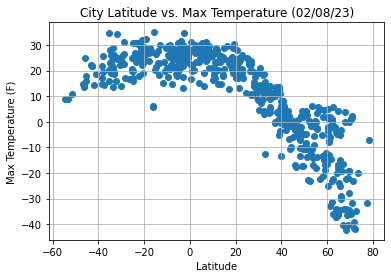

In [23]:
# Build scatter plot for latitude vs. temperature
lat = city_data_df["Lat"]
max_temp = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]
# YOUR CODE HERE
plt.scatter(lat,max_temp,marker="o")
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("../python_api_challenge/output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

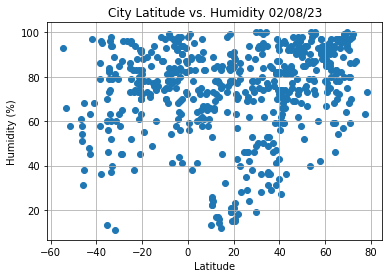

In [24]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(lat,humidity,marker="o")
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../python_api_challenge/output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

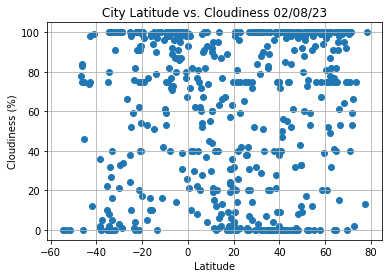

In [25]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(lat,cloudiness, marker="o")
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../python_api_challenge/output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

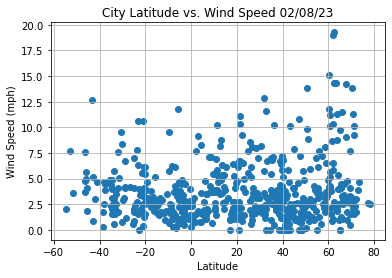

In [26]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(lat,wind_speed,marker="o")
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../python_api_challenge/output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [27]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def plot_linear_regression(x_values, y_values, title, y_label,): #text_coordinate):
#Run regression on hemisphere weather data.
    (slope, intercept, rvalue, pvalue, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
   
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()   

In [28]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df=city_data_df.loc[(city_data_df["Lat"]>=0)]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,provideniya,64.3833,-173.3000,-19.94,59,100,4.00,RU,1675919918
7,santo domingo,18.5001,-69.9886,23.35,90,24,2.68,DO,1675919854
8,san lawrenz,36.0553,14.2040,9.67,85,100,10.28,MT,1675919991
9,upernavik,72.7868,-56.1549,-34.88,86,2,3.86,GL,1675919991
11,atar,20.5169,-13.0499,21.25,23,100,1.13,MR,1675919992


In [29]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df=city_data_df.loc[(city_data_df["Lat"]<0)]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,achacachi,-16.0500,-68.6833,5.81,85,98,1.80,BO,1675919918
1,santiago,-33.4569,-70.6483,25.14,52,0,2.06,CL,1675919700
3,atuona,-9.8000,-139.0333,26.29,75,53,9.53,PF,1675919919
4,bluff,-46.6000,168.3333,14.89,61,78,7.56,NZ,1675919919
5,buseresere,-3.0236,31.8747,17.36,94,98,1.54,TZ,1675919919


###  Temperature vs. Latitude Linear Regression Plot

TypeError: plot_linear_regression() missing 3 required positional arguments: 'title', 'y_label', and 'text_coordinate'

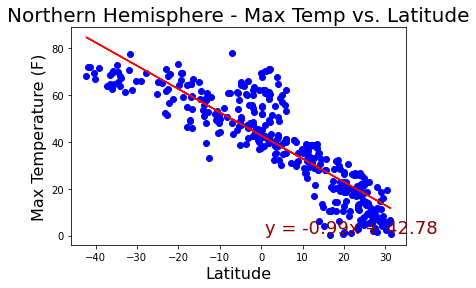

In [40]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
#def plot_linear_regression(x_values, y_values, title, y_label, text_coordinate):
#Run regression on hemisphere weather data.
x_values = northern_hemi_df["Max Temp"]
y_values = northern_hemi_df["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
regress_values = x_values * slope + intercept
    # Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
   
    # Create a scatter plot and plot the regression line.
plt.scatter(x_values,y_values,marker="o",color="blue")
plt.plot(x_values,regress_values,"r")
plt.title('Northern Hemisphere - Max Temp vs. Latitude', fontsize=20)
plt.ylabel('Max Temperature (F)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(1, 1), fontsize=18, color='darkred')    
#x_values = northern_hemi_df["Max Temp"]
#y_values = northern_hemi_df["Lat"]
# Call the function.
plot_linear_regression(x_values,
                       y_values)

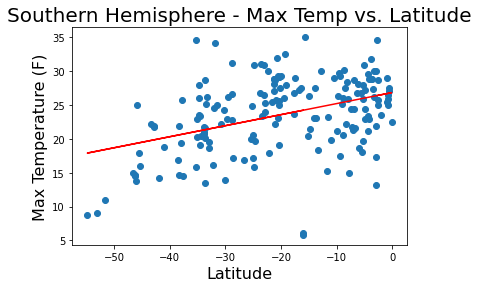

In [43]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plt.title('Southern Hemisphere - Max Temp vs. Latitude', fontsize=20)
plt.ylabel('Max Temperature (F)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')

# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature',
                       'Max Temp',(-50,90))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [50]:
# Northern Hemisphere
# YOUR CODE HERE
_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Call the function.
plt.title('Northern Hemisphere - Humidity vs. Latitude', fontsize=20)
plt.ylabel('Humidity (%)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.ylim(-6, 110)

# Set the limits of the x axis:
plt.xlim(-4, 82)
plt.show()

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 173 and the array at index 1 has size 376

In [30]:
# Southern Hemisphere
# YOUR CODE HERE
_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       "Linear Regression on the Southern Hemisphere \n for % Humidity",
                       "% Humidity",(-25,20))

TypeError: plot_linear_regression() takes 4 positional arguments but 5 were given

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [31]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       "Linear Regression on the Northern Hemisphere \n for % Cloudiness",
                       "% Cloudiness",(45,5))

TypeError: plot_linear_regression() takes 4 positional arguments but 5 were given

In [32]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       "Linear Regression on the Southern Hemisphere \n for % Cloudiness",
                       "% Cloudiness",(-50,10))

TypeError: plot_linear_regression() takes 4 positional arguments but 5 were given

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [33]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       "Linear Regression on the Northern Hemisphere \n for % Wind Speed",
                       "% Wind Speed",(10,40))

TypeError: plot_linear_regression() takes 4 positional arguments but 5 were given

In [34]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       "Linear Regression on the Southern Hemisphere \n for % Wind Speed",
                       "% Wind Speed",(-50,20))

TypeError: plot_linear_regression() takes 4 positional arguments but 5 were given

**Discussion about the linear relationship:** YOUR RESPONSE HERE